# Predicting Gross Box Office

                In recent years, the movie market has been growing larger each year.This industry generates approximately  
     billions dollars of revenue annually.In this project we have to predict gross box office.

### Importing  Required Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split

## all  Regression Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Evaluation of model performance modules
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Loading the Movie Dataset


In [2]:
data=pd.read_csv(r'C:\Users\Priya\Downloads\Movie_data.csv') 


# Data Analysis

### Top 5 Rows of Dataset

In [3]:
data.head()



color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

### Last 5 Rows of Dataset

In [4]:
data.tail()


color     director_name  num_critic_for_reviews  duration  \
5038  Color       Scott Smith                     1.0      87.0   
5039  Color               NaN                    43.0      43.0   
5040  Color  Benjamin Roberds                    13.0      76.0   
5041  Color       Daniel Hsia                    14.0     100.0   
5042  Color          Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes    gross                        genres  ...  \
5038                   637.0      NaN                  Comedy|Drama  ...   
5039                   841.0      NaN  Crime|Drama|Mystery|Thriller  ...   
5040                     0.0      NaN         Drama|Horror|Thriller  ...   
5041                   946.0  10443.0          Comedy|Drama|Romance  ...   
5042                    86.0  85222.0                   Documentary  ...   

     num_user_for_reviews language  country  content_rating  budget  \
5038                  6.0  English   Canada             NaN     NaN   
5039                359.0  English      USA           TV-14     NaN   
5040                  3.0  English      USA             NaN  1400.0   
5041                  9.0  English      USA           PG-13     NaN   
5042                 84.0  English      USA              PG  1100.0   

      title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
5038      2013.0                  470.0        7.7           NaN   
5039         NaN                  593.0        7.5         16.00   
5040      2013.0                    0.0        6.3           NaN   
5041      2012.0                  719.0        6.3          2.35   
5042      2004.0                   23.0        6.6          1.85   

     movie_facebook_likes  
5038                   84  
5039                32000  
5040                   16  
5041                  660  
5042                  456  

[5 rows x 28 columns]

### Shape of the Dataset


In [5]:
data.shape


(5043, 28)

### Description of the dataset


In [6]:
data.describe()


num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

### List of column names


In [7]:
data.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Cheking the dataset information

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

# Data Preprocessing (Feature Engineering)


### Removing Duplicates


In [9]:
data_uni=data.drop_duplicates(subset=['movie_title', 'title_year'], keep='first').copy()
data_uni.shape

(4919, 28)

### Cheking length of unique columns in dataset


In [10]:
data_uni.apply(lambda x: len(x.unique()))


color                           3
director_name                2399
num_critic_for_reviews        529
duration                      192
director_facebook_likes       436
actor_3_facebook_likes        907
actor_2_name                 3033
actor_1_facebook_likes        878
gross                        4036
genres                        914
actor_1_name                 2098
movie_title                  4916
num_voted_users              4753
cast_total_facebook_likes    3961
actor_3_name                 3522
facenumber_in_poster           20
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          955
language                       48
country                        66
content_rating                 19
budget                        440
title_year                     92
actor_2_facebook_likes        918
imdb_score                     78
aspect_ratio                   23
movie_facebook_likes          876
dtype: int64

### Cheking whether null values are present in our dataset or not


In [11]:
data_uni.isna().sum()


color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       485
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

### Dropping all the Null Values in All Columns


In [12]:
data_uni.dropna(subset=['gross'], how='any', inplace=True)


In [13]:
data_uni['budget'].fillna(data_uni['budget'].mean(),inplace=True)


In [14]:
data_uni['gross'].fillna(data_uni['gross'].mean(),inplace=True)


In [15]:
data_uni['num_critic_for_reviews'].fillna(data_uni['num_critic_for_reviews'].mean(),inplace=True)


In [16]:
data_uni['duration'].fillna(data_uni['duration'].mean(),inplace=True)


In [17]:
data_uni['director_facebook_likes'].fillna(data_uni['director_facebook_likes'].mean(),inplace=True)


In [18]:
data_uni['actor_3_facebook_likes'].fillna(data_uni['actor_3_facebook_likes'].mean(),inplace=True)


In [19]:
data_uni['actor_1_facebook_likes'].fillna(data_uni['actor_1_facebook_likes'].mean(),inplace=True)


In [20]:
data_uni['facenumber_in_poster'].fillna(data_uni['facenumber_in_poster'].mean(),inplace=True)


In [21]:
data_uni['num_user_for_reviews'].fillna(data_uni['num_user_for_reviews'].mean(),inplace=True)


In [22]:
data_uni['actor_2_facebook_likes'].fillna(data_uni['actor_2_facebook_likes'].mean(),inplace=True)


In [23]:
data_uni['imdb_score'].fillna(data_uni['imdb_score'].mean(),inplace=True)


In [24]:
data_uni['aspect_ratio'].fillna(data_uni['aspect_ratio'].mean(),inplace=True)


In [25]:
data_uni.isna().sum()


color                         2
director_name                 2
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  6
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  4
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 13
facenumber_in_poster          0
plot_keywords                40
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               64
budget                        0
title_year                    2
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

In [26]:
data_uni.fillna(0, inplace=True)  # Fill rest of missing data


In [27]:
data_uni.isna().sum()


color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [28]:
data_uni = data_uni[data_uni['title_year'] != 0]  # Deleting rows where title_year = 0
data_uni = data_uni[data_uni['country'] == 'USA']  # Budgets are in respective country currency, so we will drop it


In [29]:
data_uni.shape


(3154, 28)

# Data visualization and Correlation

<AxesSubplot:title={'center':'Pearson Correlation of Movie Features'}>

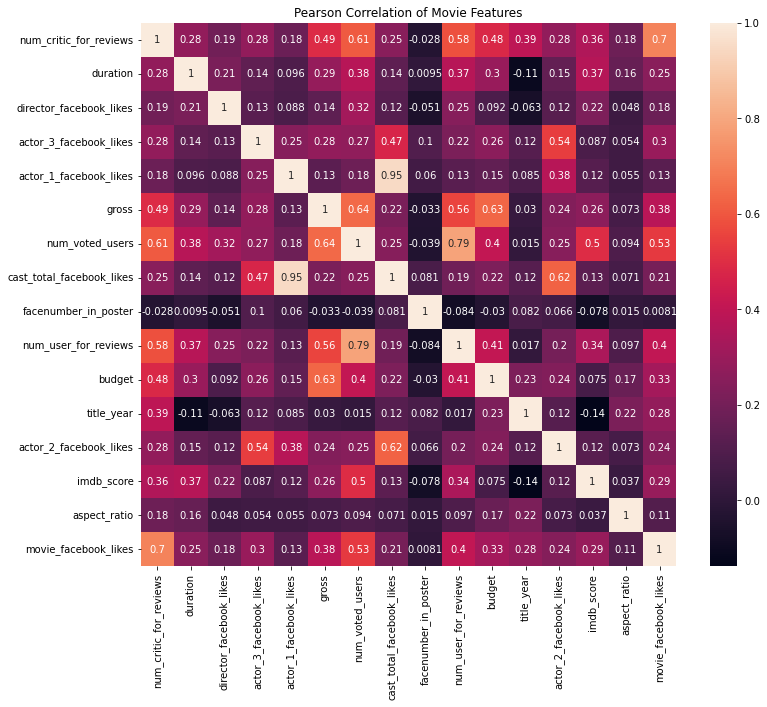

In [30]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(data_uni.corr(), annot=True)

This shows the correalation between each and every point in the dataset


<AxesSubplot:xlabel='budget', ylabel='gross'>

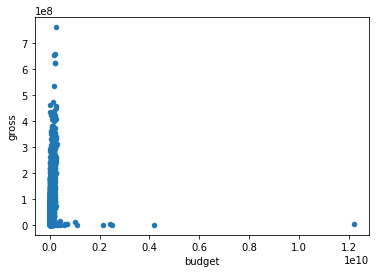

In [31]:
# Plotting scatter plot for budget and gross before data cleaning

data.plot.scatter(x='budget', y='gross')

Before data cleaning the relation between buget and gross columns is not good.


<AxesSubplot:xlabel='budget', ylabel='gross'>

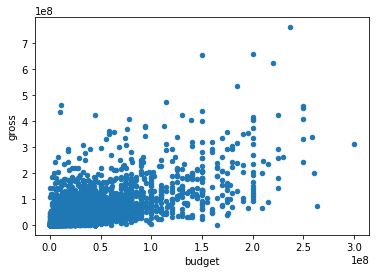

In [32]:
# Plotting scatter plot for budget and gross after data cleaning

data_uni.plot.scatter(x='budget', y='gross')


After data cleaning the relation between budget and gross columns is good


Text(0, 0.5, 'Gross (in million)')

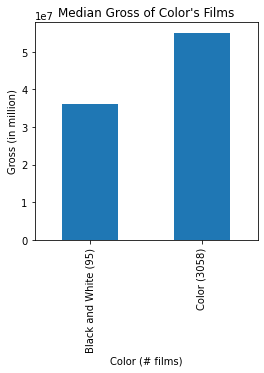

In [33]:
# Plotting the bar graph for Median Gross of Color's Films

fig = plt.figure(figsize=(4,4))
comparison_df = data_uni.groupby('color', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_uni['color'].value_counts().to_dict()
comparison_df['films'] = comparison_df['color'].map(name_count_key)

comparison_df['color'] = comparison_df['color'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['color', 'gross']][10::-1].set_index('color').iloc[:,0].plot(kind='bar')
plt.legend().set_visible(False)
plt.title("Median Gross of Color's Films")
plt.xlabel("Color (# films)")
plt.ylabel("Gross (in million)")

The black and white movies in the data set were 95 only and the movies in color is 3058


Text(0, 0.5, 'Gross (in million)')

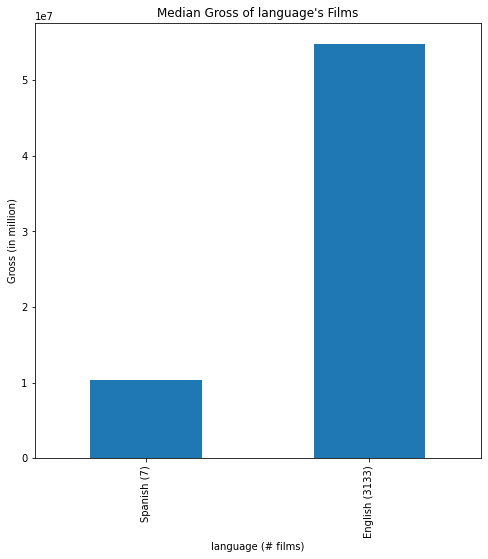

In [34]:
fig = plt.figure(figsize=(8,8))
comparison_df = data_uni.groupby('language', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_uni['language'].value_counts().to_dict()
comparison_df['films'] = comparison_df['language'].map(name_count_key)

comparison_df['language'] = comparison_df['language'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['language', 'gross']][::-1].set_index('language').iloc[:,0].plot(kind='bar')
#data.plot.scatter(x='country', y='gross')
plt.legend().set_visible(False)
plt.title("Median Gross of language's Films")
plt.xlabel("language (# films)")
plt.ylabel("Gross (in million)")

Movies in english was 3133 and spanish is 7 only.


Text(0, 0.5, 'Gross (in million)')

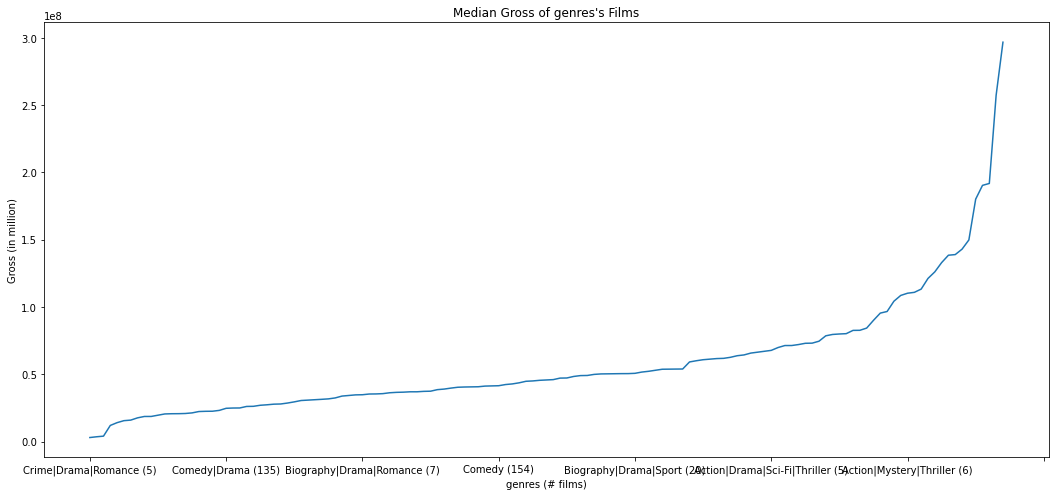

In [35]:
fig = plt.figure(figsize=(18,8))
comparison_df = data_uni.groupby('genres', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_uni['genres'].value_counts().to_dict()
comparison_df['films'] = comparison_df['genres'].map(name_count_key)

comparison_df['genres'] = comparison_df['genres'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['genres', 'gross']][::-1].set_index('genres').iloc[:,0].plot(kind='line')
plt.legend().set_visible(False)
plt.title("Median Gross of genres's Films")
plt.xlabel("genres (# films)")
plt.ylabel("Gross (in million)")

Text(0.5, 0, 'Content rating (in million)')

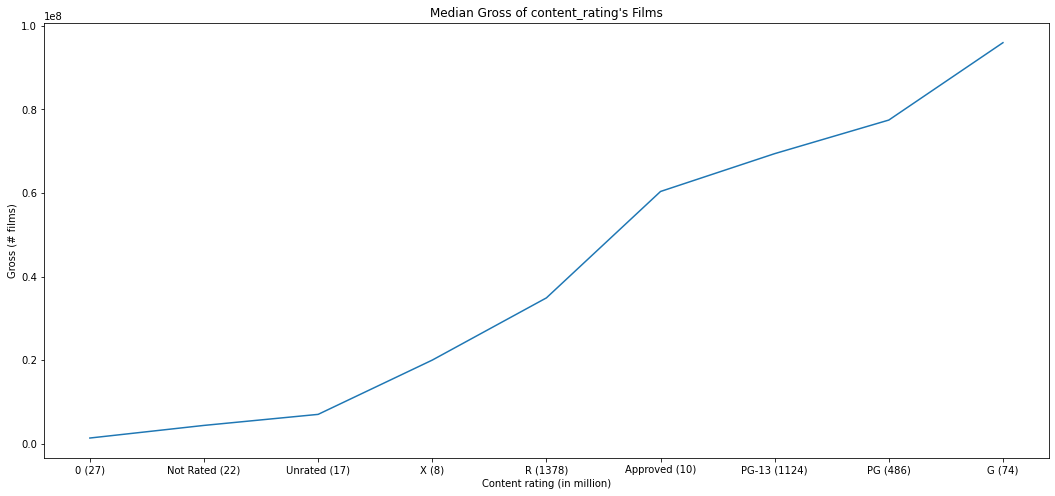

In [36]:
fig = plt.figure(figsize=(18,8))
comparison_df = data_uni.groupby('content_rating', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_uni['content_rating'].value_counts().to_dict()
comparison_df['films'] = comparison_df['content_rating'].map(name_count_key)

comparison_df['content_rating'] = comparison_df['content_rating'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['content_rating', 'gross']][::-1].set_index('content_rating').iloc[:,0].plot(kind='line')
plt.legend().set_visible(False)
plt.title("Median Gross of content_rating's Films")
plt.ylabel("Gross (# films)")
plt.xlabel("Content rating (in million)")

In [37]:
data_uni.drop(["color", "director_facebook_likes", "actor_1_facebook_likes", "movie_title", "actor_3_name", "cast_total_facebook_likes", "facenumber_in_poster", "plot_keywords","language","country","title_year","movie_imdb_link","actor_2_facebook_likes","aspect_ratio",'director_name','actor_2_name','genres','actor_1_name','content_rating'],axis=1,inplace=True)


In [38]:
data_uni.shape


(3154, 9)

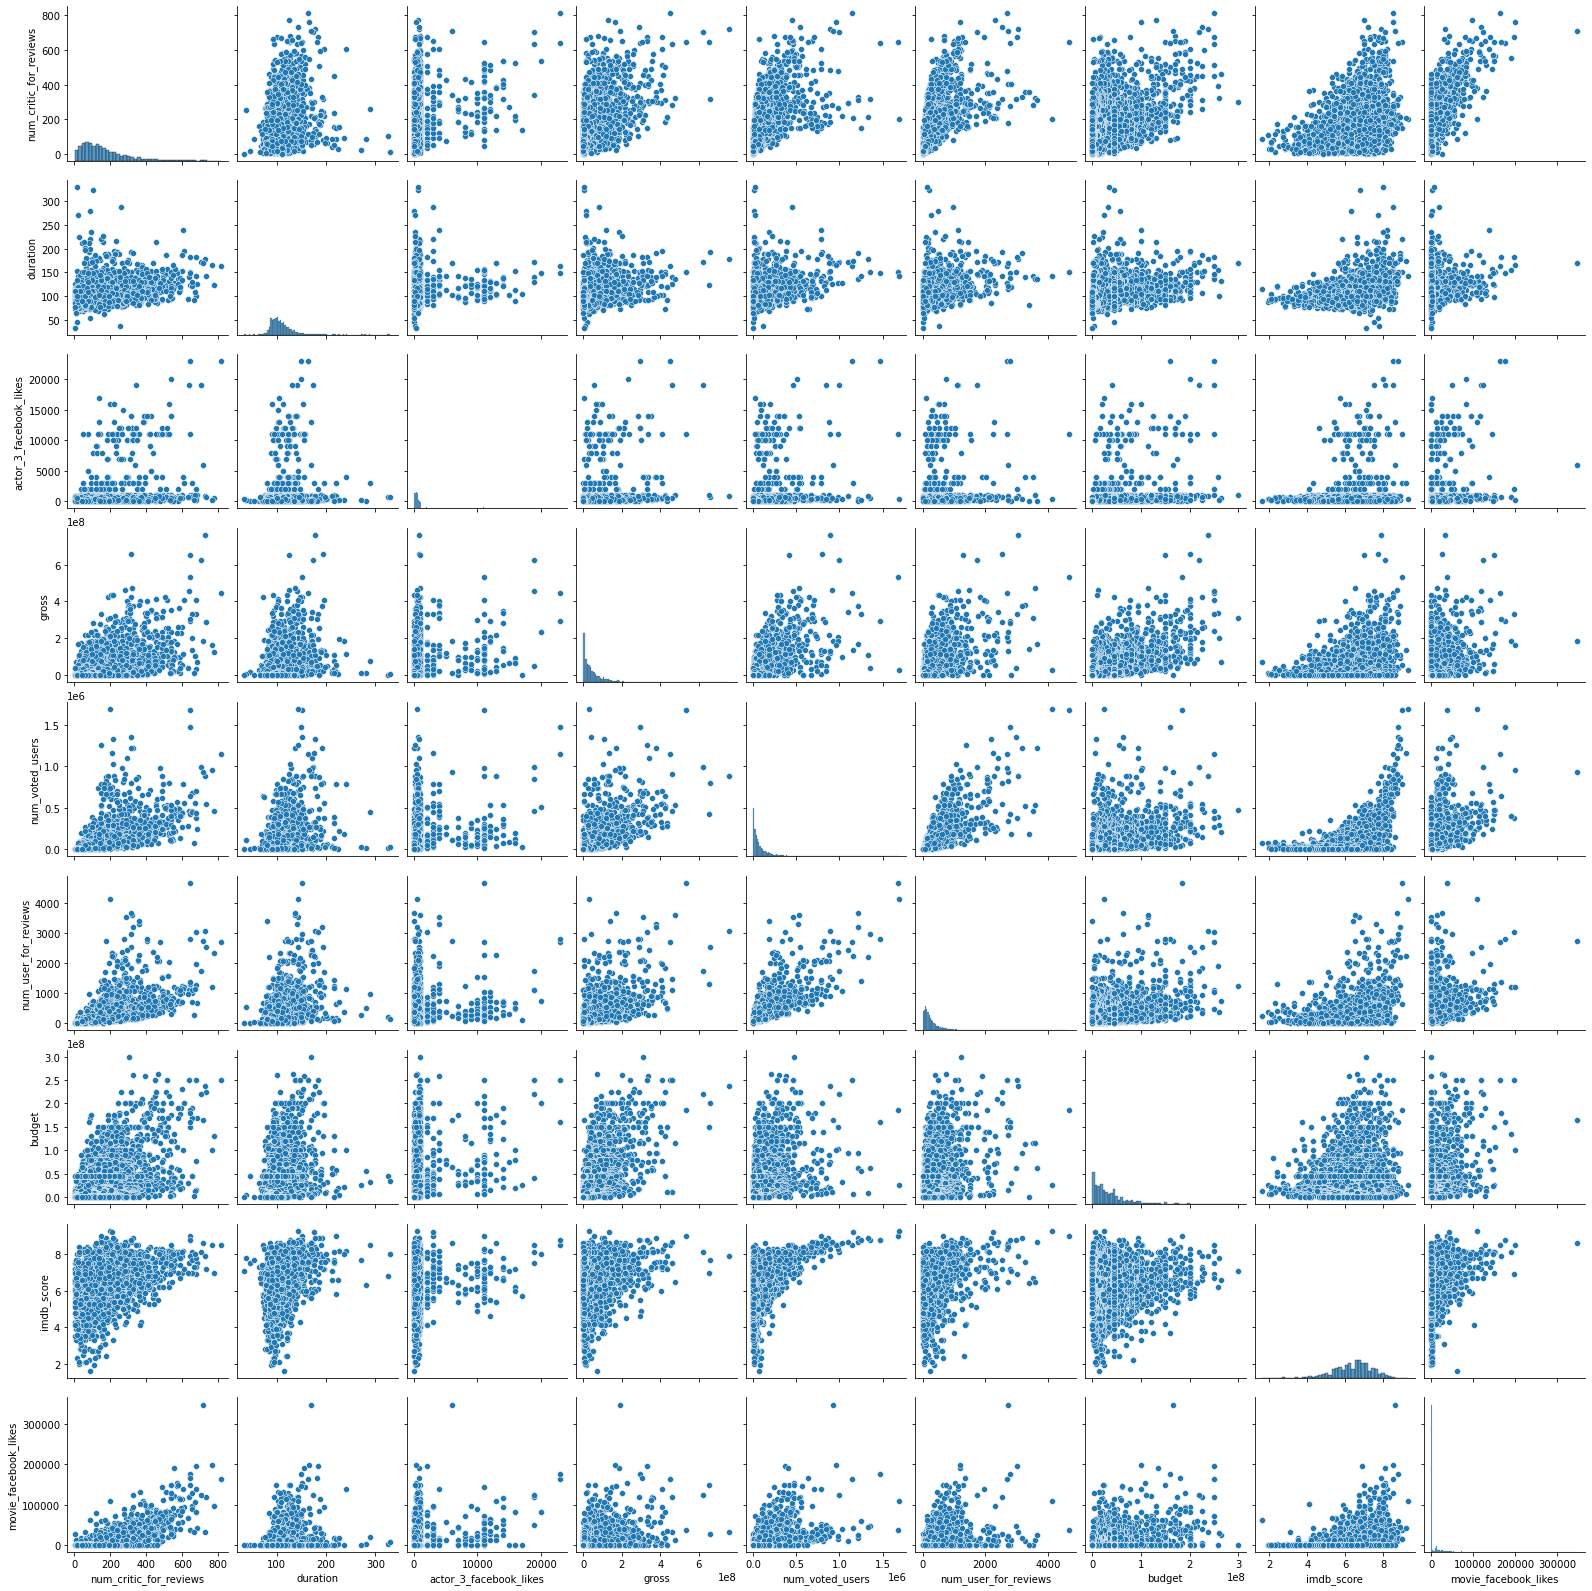

In [39]:
#Pair plot

sns.pairplot(data_uni)

<AxesSubplot:>

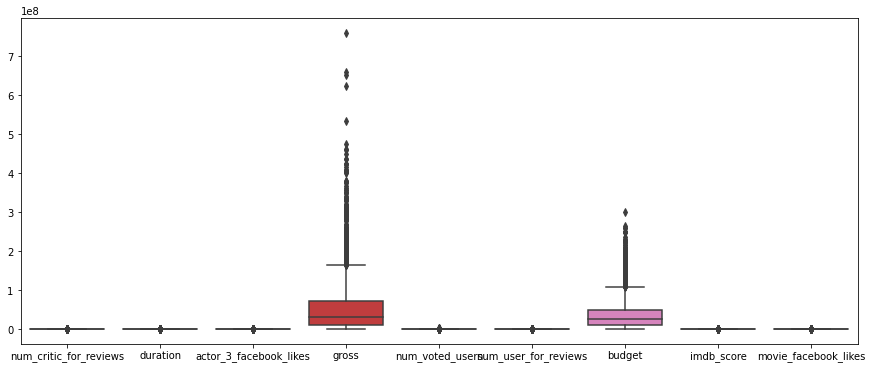

In [40]:
#Box plot

plt.figure(figsize=(15,6)) # Set plot dimensions

sns.boxplot(data=data_uni)

<AxesSubplot:>

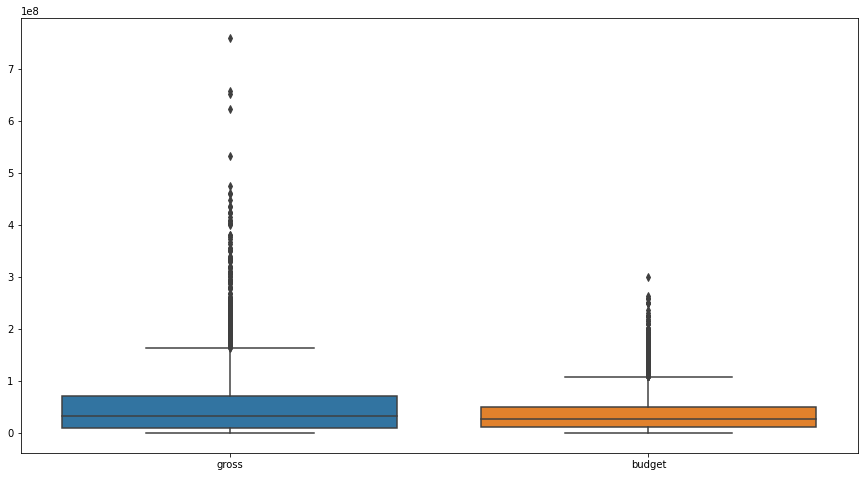

In [41]:
plt.figure(figsize=(15,8))
stats_df = data_uni.drop(['num_critic_for_reviews','duration','actor_3_facebook_likes','num_voted_users','num_user_for_reviews','imdb_score','movie_facebook_likes'],axis=1)
sns.boxplot(data=stats_df)

In [42]:
data_uni.head()


num_critic_for_reviews  duration  actor_3_facebook_likes        gross  \
0                   723.0     178.0                   855.0  760505847.0   
1                   302.0     169.0                  1000.0  309404152.0   
3                   813.0     164.0                 23000.0  448130642.0   
5                   462.0     132.0                   530.0   73058679.0   
6                   392.0     156.0                  4000.0  336530303.0   

   num_voted_users  num_user_for_reviews       budget  imdb_score  \
0           886204                3054.0  237000000.0         7.9   
1           471220                1238.0  300000000.0         7.1   
3          1144337                2701.0  250000000.0         8.5   
5           212204                 738.0  263700000.0         6.6   
6           383056                1902.0  258000000.0         6.2   

   movie_facebook_likes  
0                 33000  
1                     0  
3                164000  
5                 24000  
6                     0

In [43]:
data_uni.describe()


num_critic_for_reviews     duration  actor_3_facebook_likes  \
count             3154.000000  3154.000000             3154.000000   
mean               157.878189   108.856834              787.358950   
std                123.281429    22.015258             1890.361807   
min                  1.000000    34.000000                0.000000   
25%                 69.000000    95.000000              223.000000   
50%                128.000000   105.000000              460.500000   
75%                213.000000   118.000000              709.500000   
max                813.000000   330.000000            23000.000000   

              gross  num_voted_users  num_user_for_reviews        budget  \
count  3.154000e+03     3.154000e+03           3154.000000  3.154000e+03   
mean   5.453055e+07     1.027202e+05            318.341476  3.973165e+07   
std    7.091320e+07     1.553584e+05            403.383918  4.205053e+07   
min    7.030000e+02     5.000000e+00              1.000000  2.180000e+02   
25%    9.592406e+06     1.588125e+04             97.000000  1.100000e+07   
50%    3.183737e+07     4.944550e+04            195.000000  2.700000e+07   
75%    7.134699e+07     1.221245e+05            379.750000  5.000000e+07   
max    7.605058e+08     1.689764e+06           4667.000000  3.000000e+08   

        imdb_score  movie_facebook_likes  
count  3154.000000           3154.000000  
mean      6.386081           8804.079899  
std       1.051198          21325.775593  
min       1.600000              0.000000  
25%       5.800000              0.000000  
50%       6.500000            215.000000  
75%       7.100000          10000.000000  
max       9.300000         349000.000000

# Splitting The Data


In [44]:
# univariate data
X = data_uni.drop(['gross'],axis=1)
Y = data_uni['gross']

In [45]:
## we have to split the data to avoiding overfitting the data [points]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=101, test_size=0.10)

In [46]:
y_train,y_test = y_train.to_numpy(),y_test.to_numpy()


In [47]:
y_test.shape


(316,)

In [48]:
X_train.shape


(2838, 8)

In [49]:
y_train.shape


(2838,)

In [50]:
X_test.shape


(316, 8)

## Features Scaling


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)
X_test_scaled.head()

num_critic_for_reviews  duration  actor_3_facebook_likes  num_voted_users  \
0               -0.154577 -0.197947               -0.182808        -0.559125   
1               -0.649394  0.051427               -0.083943        -0.318705   
2               -0.171070 -0.239509                7.296193        -0.540327   
3                2.575166  0.508612                0.073158         1.709341   
4                0.884540 -0.322634               -0.135858         0.042252   

   num_user_for_reviews    budget  imdb_score  movie_facebook_likes  
0             -0.619245 -0.339900   -0.317762             -0.438372  
1             -0.561108  0.491007   -0.317762             -0.438372  
2             -0.607617 -0.339900   -0.705830             -0.398765  
3              5.040419  3.458532   -0.220745             -0.204010  
4             -0.328558  0.680928   -0.705830              0.264712

<AxesSubplot:>

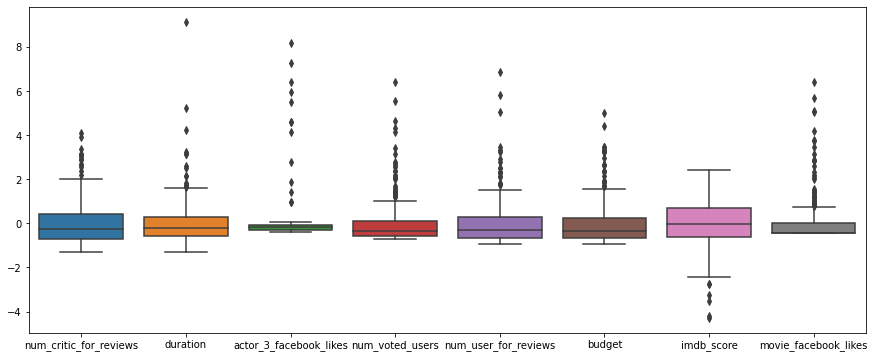

In [52]:
plt.figure(figsize=(15,6)) # Set plot dimensions

sns.boxplot(data=X_test_scaled)

<AxesSubplot:>

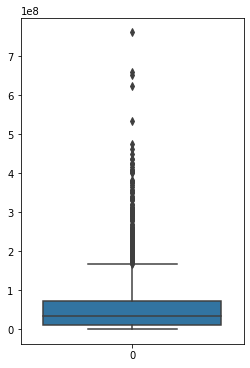

In [53]:
plt.figure(figsize=(4,6)) # Set plot dimensions

sns.boxplot(data=y_train)

# Building Machine Learning model


## Model-1 : Linear Regression Algorithm


In [54]:
# linear regression model creating with parameters
model_lr = LinearRegression()

In [55]:
# train the model 
model_lr.fit(X_train_scaled,y_train)

LinearRegression()

In [56]:
# prediction the model
pred_lr = model_lr.predict(X_test_scaled)

In [57]:
lr_score=round(metrics.r2_score(y_test,pred_lr)*100,2)
lr_score

55.51

In [58]:
# score and errors 
print('Score:', round(metrics.r2_score(y_test, pred_lr)*100,2))
print('MAE  :', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE  :', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))

Score: 55.51
MAE  : 26353070.17894456
MSE  : 1522885630328498.8
RMSE : 39024167.25989805


By using LinearRegression algorithm we have got 55.51 percentage accuracy


## Model-2 : Decision Tree Regressor


In [59]:
decs_tree = DecisionTreeRegressor()


In [60]:
decs_tree.fit(X_train,y_train)


DecisionTreeRegressor()

In [61]:
pred_decs_tree = decs_tree.predict(X_test)


In [62]:
dt_score=round(metrics.r2_score(y_test, pred_decs_tree)*100,2)
dt_score

29.54

In [63]:
# score and errors 
print('Score:', round(metrics.r2_score(y_test, pred_decs_tree)*100,2))
print('MAE  :', metrics.mean_absolute_error(y_test, pred_decs_tree))
print('MSE  :', metrics.mean_squared_error(y_test, pred_decs_tree))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_decs_tree)))

Score: 29.54
MAE  : 31306914.04113924
MSE  : 2411938365390738.0
RMSE : 49111489.13839549


By using DecisionTreeRegressor algorithm we have got 29.54 percentage accuracy


## Model-3 : Random Forest


In [64]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [65]:
rf.fit(X_train,y_train)


RandomForestRegressor()

In [66]:
#prediction from rf model
rf_prediction = rf.predict(X_test)

<AxesSubplot:ylabel='Density'>

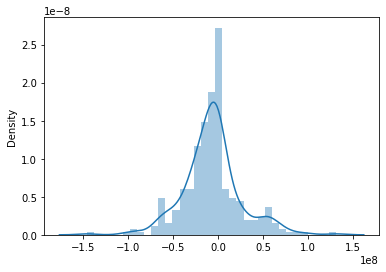

In [67]:
#loss of distribution
sns.distplot(y_test-rf_prediction)

In [68]:
rf_score=round(rf.score(X_test,y_test)*100,2)
rf_score

67.86

In [69]:
# score and errors 
print('Score:', round(metrics.r2_score(y_test, rf_prediction)*100,2))
print('MAE  :', metrics.mean_absolute_error(y_test, rf_prediction))
print('MSE  :', metrics.mean_squared_error(y_test, rf_prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

Score: 67.86
MAE  : 23347902.544462025
MSE  : 1100194612847998.0
RMSE : 33169181.672872156


By using RandomForestRegressor algorithm we have got 67.86 percentage accuracy


## Model-4 : KNN(K-NEAREST NEIGHBOUR)


In [70]:
knn = KNeighborsRegressor()


In [71]:
knn.fit(X_train_scaled,y_train)


KNeighborsRegressor()

In [72]:
knn_pred = knn.predict(X_test_scaled)


In [73]:
knn_score=round(knn.score(X_test_scaled , y_test) * 100, 2)
knn_score

56.09

In [75]:
# score and errors 
print('Score:',round(knn.score(X_test_scaled , y_test) * 100, 2))
print('MAE  :', metrics.mean_absolute_error(y_test, knn_pred))
print('MSE  :', metrics.mean_squared_error(y_test, knn_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

Score: 56.09
MAE  : 26034284.364556957
MSE  : 1503218987268977.5
RMSE : 38771368.13769895


By using KNeighborsRegressor algorithm we have got 56.09 percentage accuracy


In [76]:
models = pd.DataFrame({
    'Model': ['DecisionTreeRegressor', 'KNeighborsRegressor',
             'RandomForestRegressor','LinearRegressor'],
    'Score': [dt_score, knn_score,
              rf_score, lr_score]})
models.sort_values(by='Score', ascending=False)

Model  Score
2  RandomForestRegressor  67.86
1    KNeighborsRegressor  56.09
3        LinearRegressor  55.51
0  DecisionTreeRegressor  29.54

# CONCLUSION


              To predict the Gross Box Office i have used 4-models of supervised Machine Learning algorithms. Those are DecisionTreeRegressor, KNeighborsRegressor,RandomForestRegressor,LinearRegressor. In this algorithms the best algorithm is RandomForestRegressor because it has high accuracy score compared to remaining 3 algorithms.
